In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [1]:
All_projections_classic = [CreateBipartite(CreateNXGraph(split_data[i]), "classic", ListsMEP[i]) for i in range(len(split_data))]
All_projections_weighted = [CreateBipartite(CreateNXGraph(split_data[i]), "collab_weight", ListsMEP[i]) for i in range(len(split_data))]

NameError: name 'split_data' is not defined

The list above (All_projection) contains the 12 different projections of the 12 different subgraphs we created. The two different lists correspond the 2 different ways of projections we created

In [5]:
# G_0 = All_projections_classic[0]
# Gcc = sorted(nx.connected_components(G_0), key=len, reverse=True)
# G_1 = G_0.subgraph(Gcc[0])
# This code would give us the biggest component in a graph

G_1 = All_projections_classic[0]

#plt.figure(dpi = 800) #dpi = 500 ? 
matplotlib.rcParams["figure.dpi"] = 800
pos = nx.random_layout(G_1, seed=696)
d = dict(G_1.degree)
nx.draw(G_1, nodelist=d.keys(), node_size=[1 * int(v != 0)  for v in d.values()], width = 0.2)
plt.plot()

NameError: name 'All_projections_classic' is not defined

In [6]:
#The different EU parties: 
#EPP        -  European Peoples Party
#S&D        -  Party of European Socialists
#RE         -  Alliance of Liberals and Democrats for Europe Party  /  European Democratic Party
#ECR        -  European Conservatives and Reformists Party
#ID         -  Identity and Democracy Party
#Greens/EFA -  European Green Party/European Free Alliance
#GUE/NGL    -  Party of the European Left


#(EPP  és ECR -	European Christian Political Movement)

Hierarchic Cluster for the original graph and the colorful graph colored according to the EP groups

In [19]:
def getMEPData(MEP):
    x = ENTIRE_DATASET.query("MEPName == @MEP")
    x = x.iloc[0]
    x = x.drop(['AmendmentID',
                'Committee',
                'Dossier',
                'PENumber',
                'DocumentType',
                'Date'])
    return dict(x)

def ListMEPs(Dataset):
    # we use MEPName instead of OfficialMEPID
    o = pd.unique(Dataset['MEPName'])
    #print(type(o)) #DEBUG
    return o

def CreateNXGraph(Dataset):
    """
    :input Dataset: A subset of the cosponsorship table in pandas df
    :return: The nx bipartite graph of the MEPs and amendments
    """
    G = nx.from_pandas_edgelist(Dataset, source='AmendmentID', target='MEPName')
    return G

def ConnectFromBipartite(myGraph, Gtype, MEP_lista):
    """
    :input myGraph: A subset of the cosponsorship table in pandas df
    :input Gtype: Type of projection to use from {"classic", "collab_weight"}
    :input MEP_lista: List of relevant MEPs
    :return: The simple projected Data set
    """
    
    
    if Gtype == "classic":
        G = nx.algorithms.bipartite.projected_graph(myGraph, MEP_lista)
    elif Gtype == "collab_weight":
        G = nx.algorithms.bipartite.collaboration_weighted_projected_graph(myGraph, MEP_lista)
    return G 

In [29]:
def Clustering(Graf,N_of_clusters):
    return 0

def coloring_list(Graf): 
    color_map = []
    for node in Graf:
        print(getMEPData(node)['EPGroup'])
        if getMEPData(node)['EPGroup'] == 'EPP':
            color_map.append('blue')
        elif getMEPData(node)['EPGroup'] == 'S&D':
            color_map.append('red')
        elif getMEPData(node)['EPGroup'] == 'RE':
            color_map.append('yellow')
        elif getMEPData(node)['EPGroup'] == 'ECR':
            color_map.append('orange')  
        elif getMEPData(node)['EPGroup'] == 'ID':
            color_map.append('white')   
        elif getMEPData(node)['EPGroup'] == 'Greens/EFA':
            color_map.append('green')
        else:
            color_map.append('white')

    print(f"Length of the color mapping:{len(color_map)}")
    print(f"Length of the node list:{len(Graf.nodes())}")
    return color_map


def Color_EPgroups_in_graph(Graf,color_map):
    matplotlib.rcParams["figure.dpi"] = 800
    plt.figure(dpi = 800)
    d = dict(Graf.degree)
    nx.draw_networkx(Graf, node_size=0.3, width = 0.1, node_color=color_map, with_labels=False) #node_size=[0.3 * int(v != 0)  for v in d.values()]
    plt.plot()
    plt.show()
    return 0


def Remove_0_deg_nodes(Graf):   #removes the 0 degree nodes from a graph 
    remove = [node for node,degree in dict(Graf.degree()).items() if degree < 1]
    Graf.remove_nodes_from(remove)
    return Graf


def Greatest_component(Graf):   #returns the greatest component of a graph
    Gcc = sorted(nx.connected_components(Graf), key=len, reverse=True)
    Great_Component = Graf.subgraph(Gcc[0])    
    return Great_Component


In [22]:
ENTIRE_DATASET = pd.read_csv('./db/ep_cosponsorship_dataset.csv', header = 0, keep_default_na = False)
ALL_MEP_lista = ListMEPs(ENTIRE_DATASET) 
The_Weighted_Graf = ConnectFromBipartite(CreateNXGraph(ENTIRE_DATASET), "collab_weight", ALL_MEP_lista)
The_Weighted_Graf = Greatest_component(The_Weighted_Graf)
CM = coloring_list(The_Weighted_Graf)

EPP
ECR
ID
Greens/EFA
RE
S&D
RE
EPP
S&D
S&D
S&D
S&D
NI
ECR
EPP
RE
EPP
ECR
S&D
EPP
ECR
ECR
ECR
ECR
EPP
RE
RE
Greens/EFA
ID
RE
ID
ID
ID
NI
ID
ID
ID
ID
RE
RE
RE
Greens/EFA
RE
RE
S&D
ID
ID
ID
ID
ID
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
ECR
S&D
S&D
ECR
ECR
S&D
S&D
EPP
GUE/NGL
GUE/NGL
GUE/NGL
EPP
GUE/NGL
ID
GUE/NGL
ID
ID
ID
S&D
S&D
Greens/EFA
RE
RE
RE
RE
RE
RE
EPP
RE
Greens/EFA
NI
ID
ECR
ECR
EPP
ID
RE
RE
S&D
S&D
EPP
EPP
S&D
ECR
S&D
RE
RE
RE
RE
RE
RE
RE
GUE/NGL
GUE/NGL
ECR
RE
RE
NI
RE
S&D
ECR
ECR
S&D
EPP
EPP
EPP
EPP
EPP
EPP
S&D
S&D
RE
S&D
ECR
S&D
Greens/EFA
GUE/NGL
RE
RE
RE
RE
RE
RE
RE
RE
GUE/NGL
GUE/NGL
GUE/NGL
GUE/NGL
GUE/NGL
EPP
ECR
EPP
EPP
ECR
ECR
ECR
ECR
ID
Greens/EFA
S&D
S&D
S&D
S&D
S&D
S&D
S&D
S&D
RE
RE
RE
RE
RE
EPP
EPP
GUE/NGL
EPP
EPP
EPP
EPP
RE
RE
ECR
S&D
S&D
S&D
RE
RE
RE
S&D
ECR
S&D
Greens/EFA
EPP
RE
S&D
Greens/EFA
S&D
ECR
Greens/EFA
EPP
S&D
GUE/NGL
EPP
S&D
EPP
EPP
RE
RE
RE
RE
GUE/NGL
ID
ECR
S&D
EPP
NI
ID
ID
ID
ID
EPP
RE
RE
RE
RE
RE
GUE/NGL
EPP
S&D
ID
EPP
S&D
ID
ID
S&D
GUE/NGL

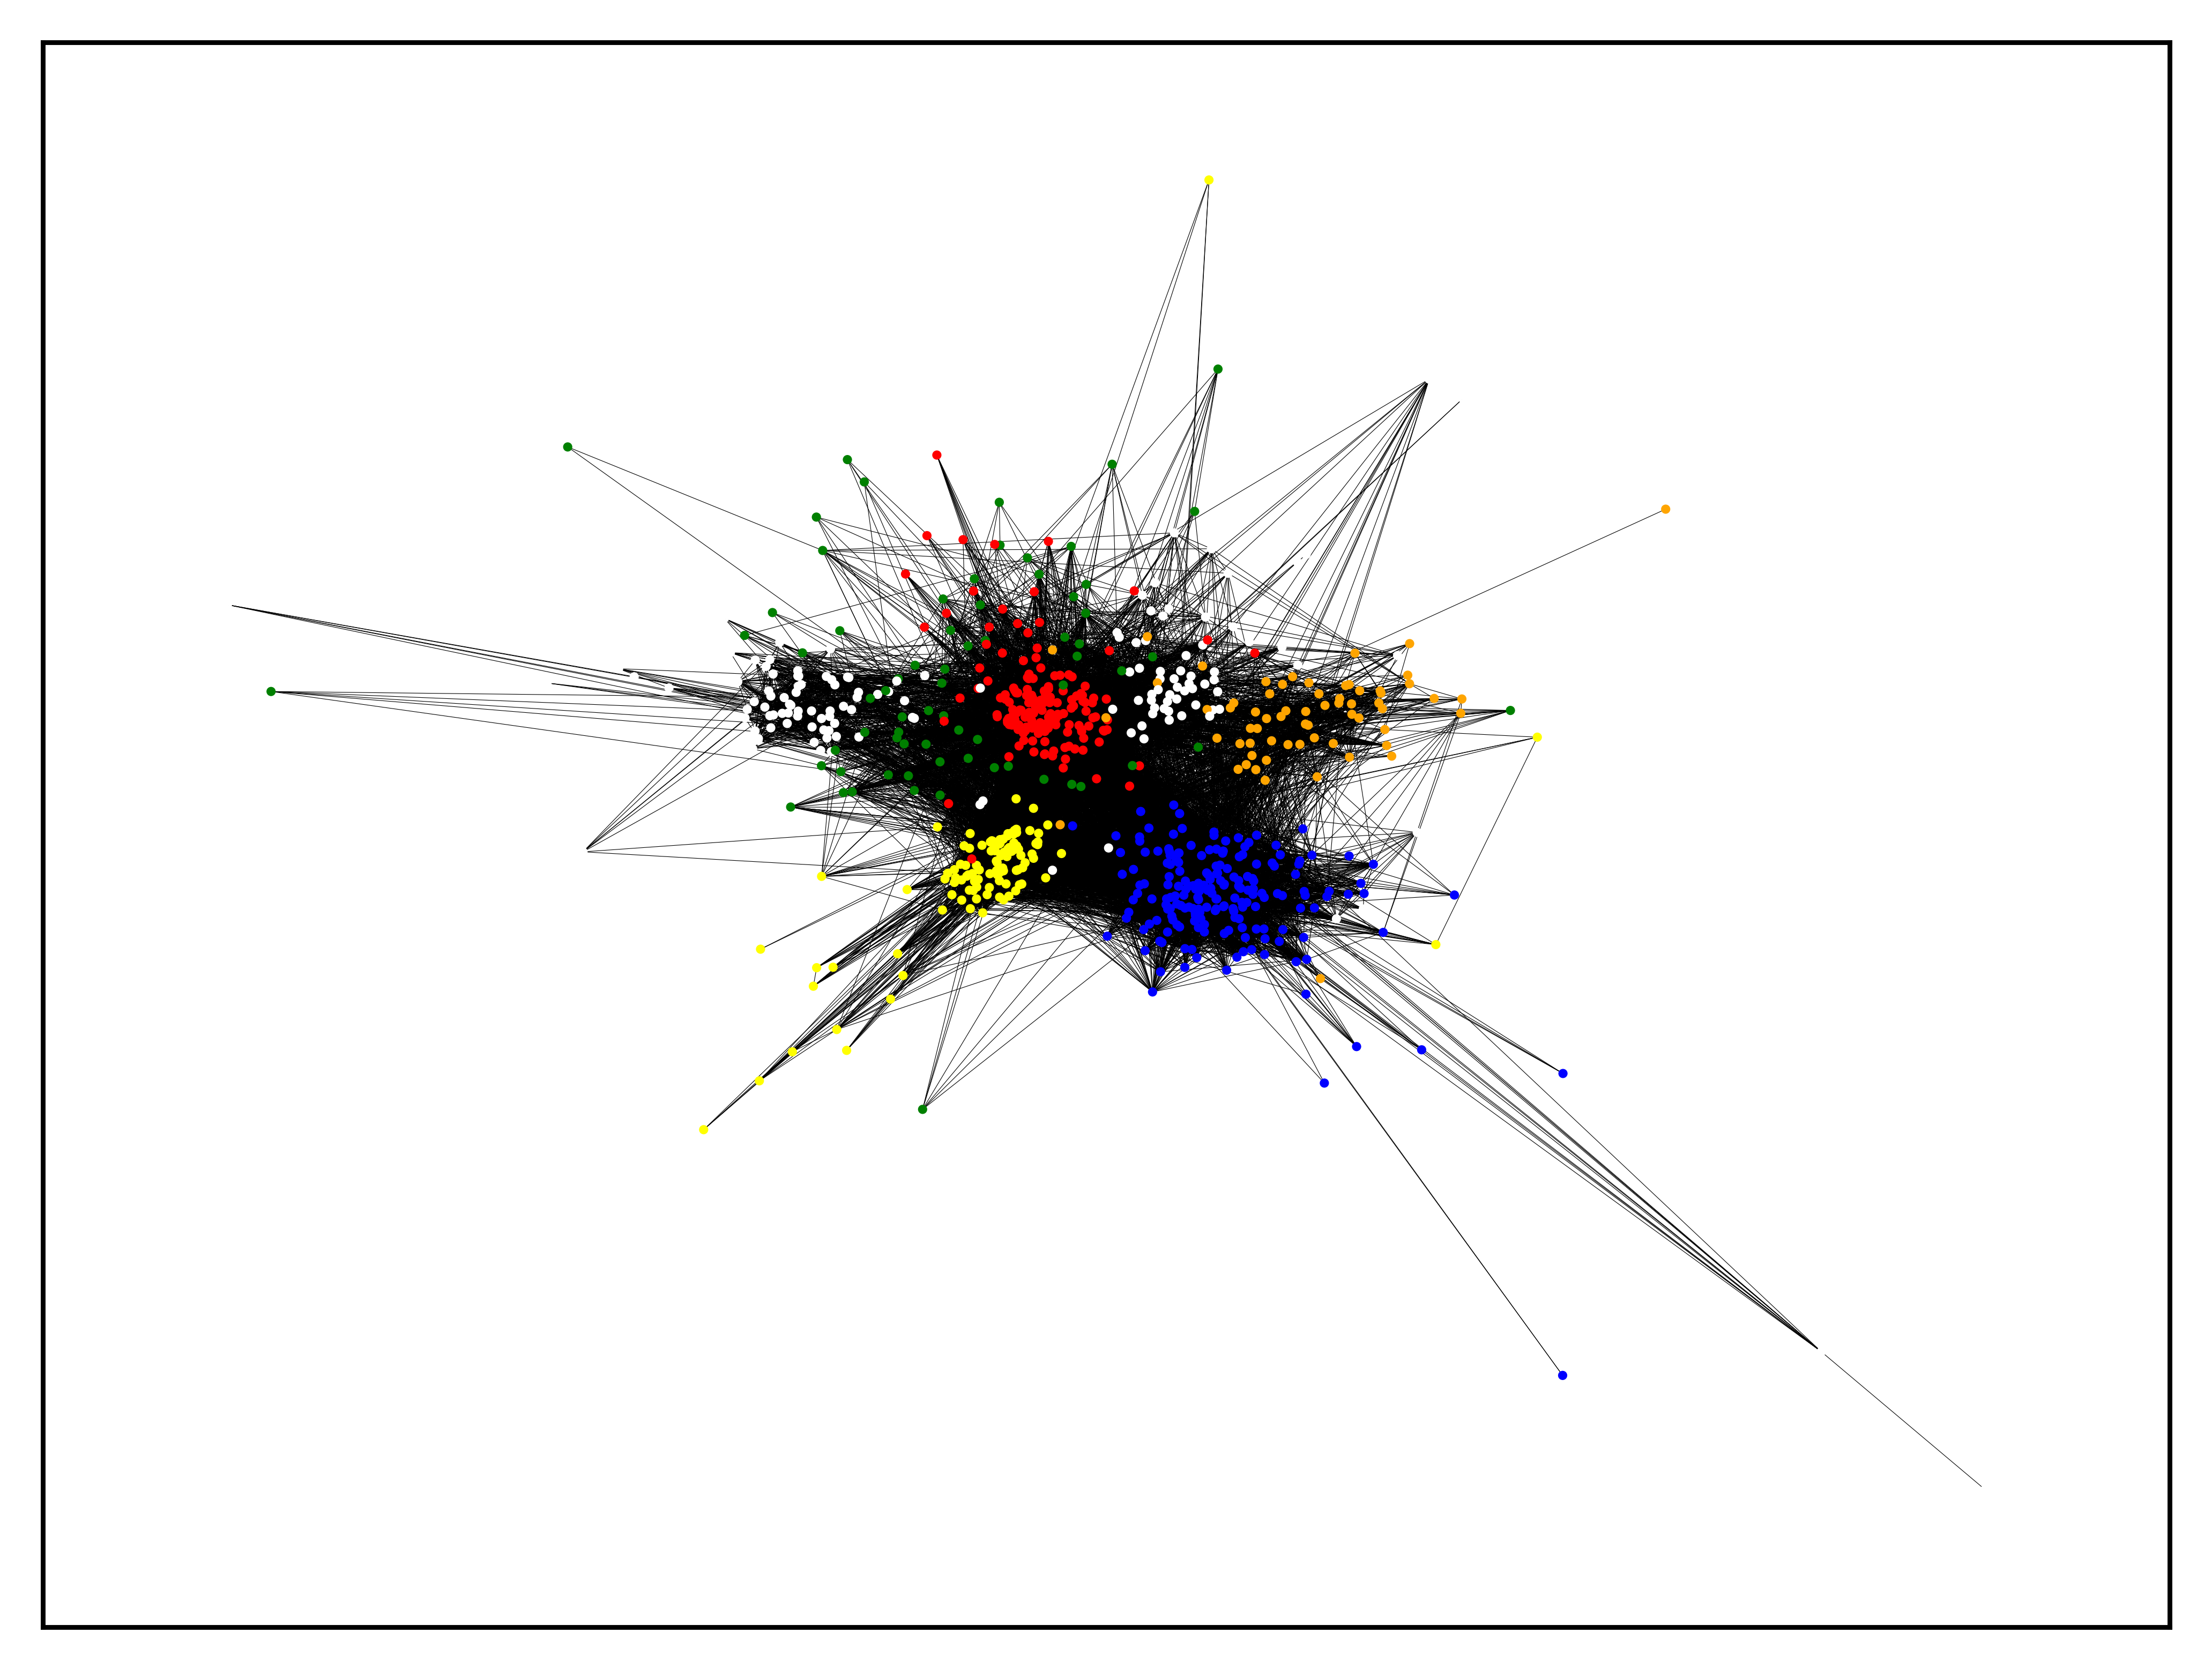

In [30]:
CM = Color_EPgroups_in_graph(The_Weighted_Graf, CM)

In [ ]:
NNodes = ["anna", "balazs", "cecil", "draven", "emil", "frufru", "gabi", "hajnal" ]
EEdges = [("anna", "balazs"),("balazs", "cecil"), ("cecil", "draven"), ("draven", "anna"), ("emil", "frufru"), ("frufru", "gabi"), ("gabi", "hajnal"), ("hajnal", "emil"), ("anna", "emil"), ("balazs", "frufru"), ("cecil", "gabi"), ("draven","hajnal" )]
G = nx.Graph(nodes = NNodes, edges = EEdges)

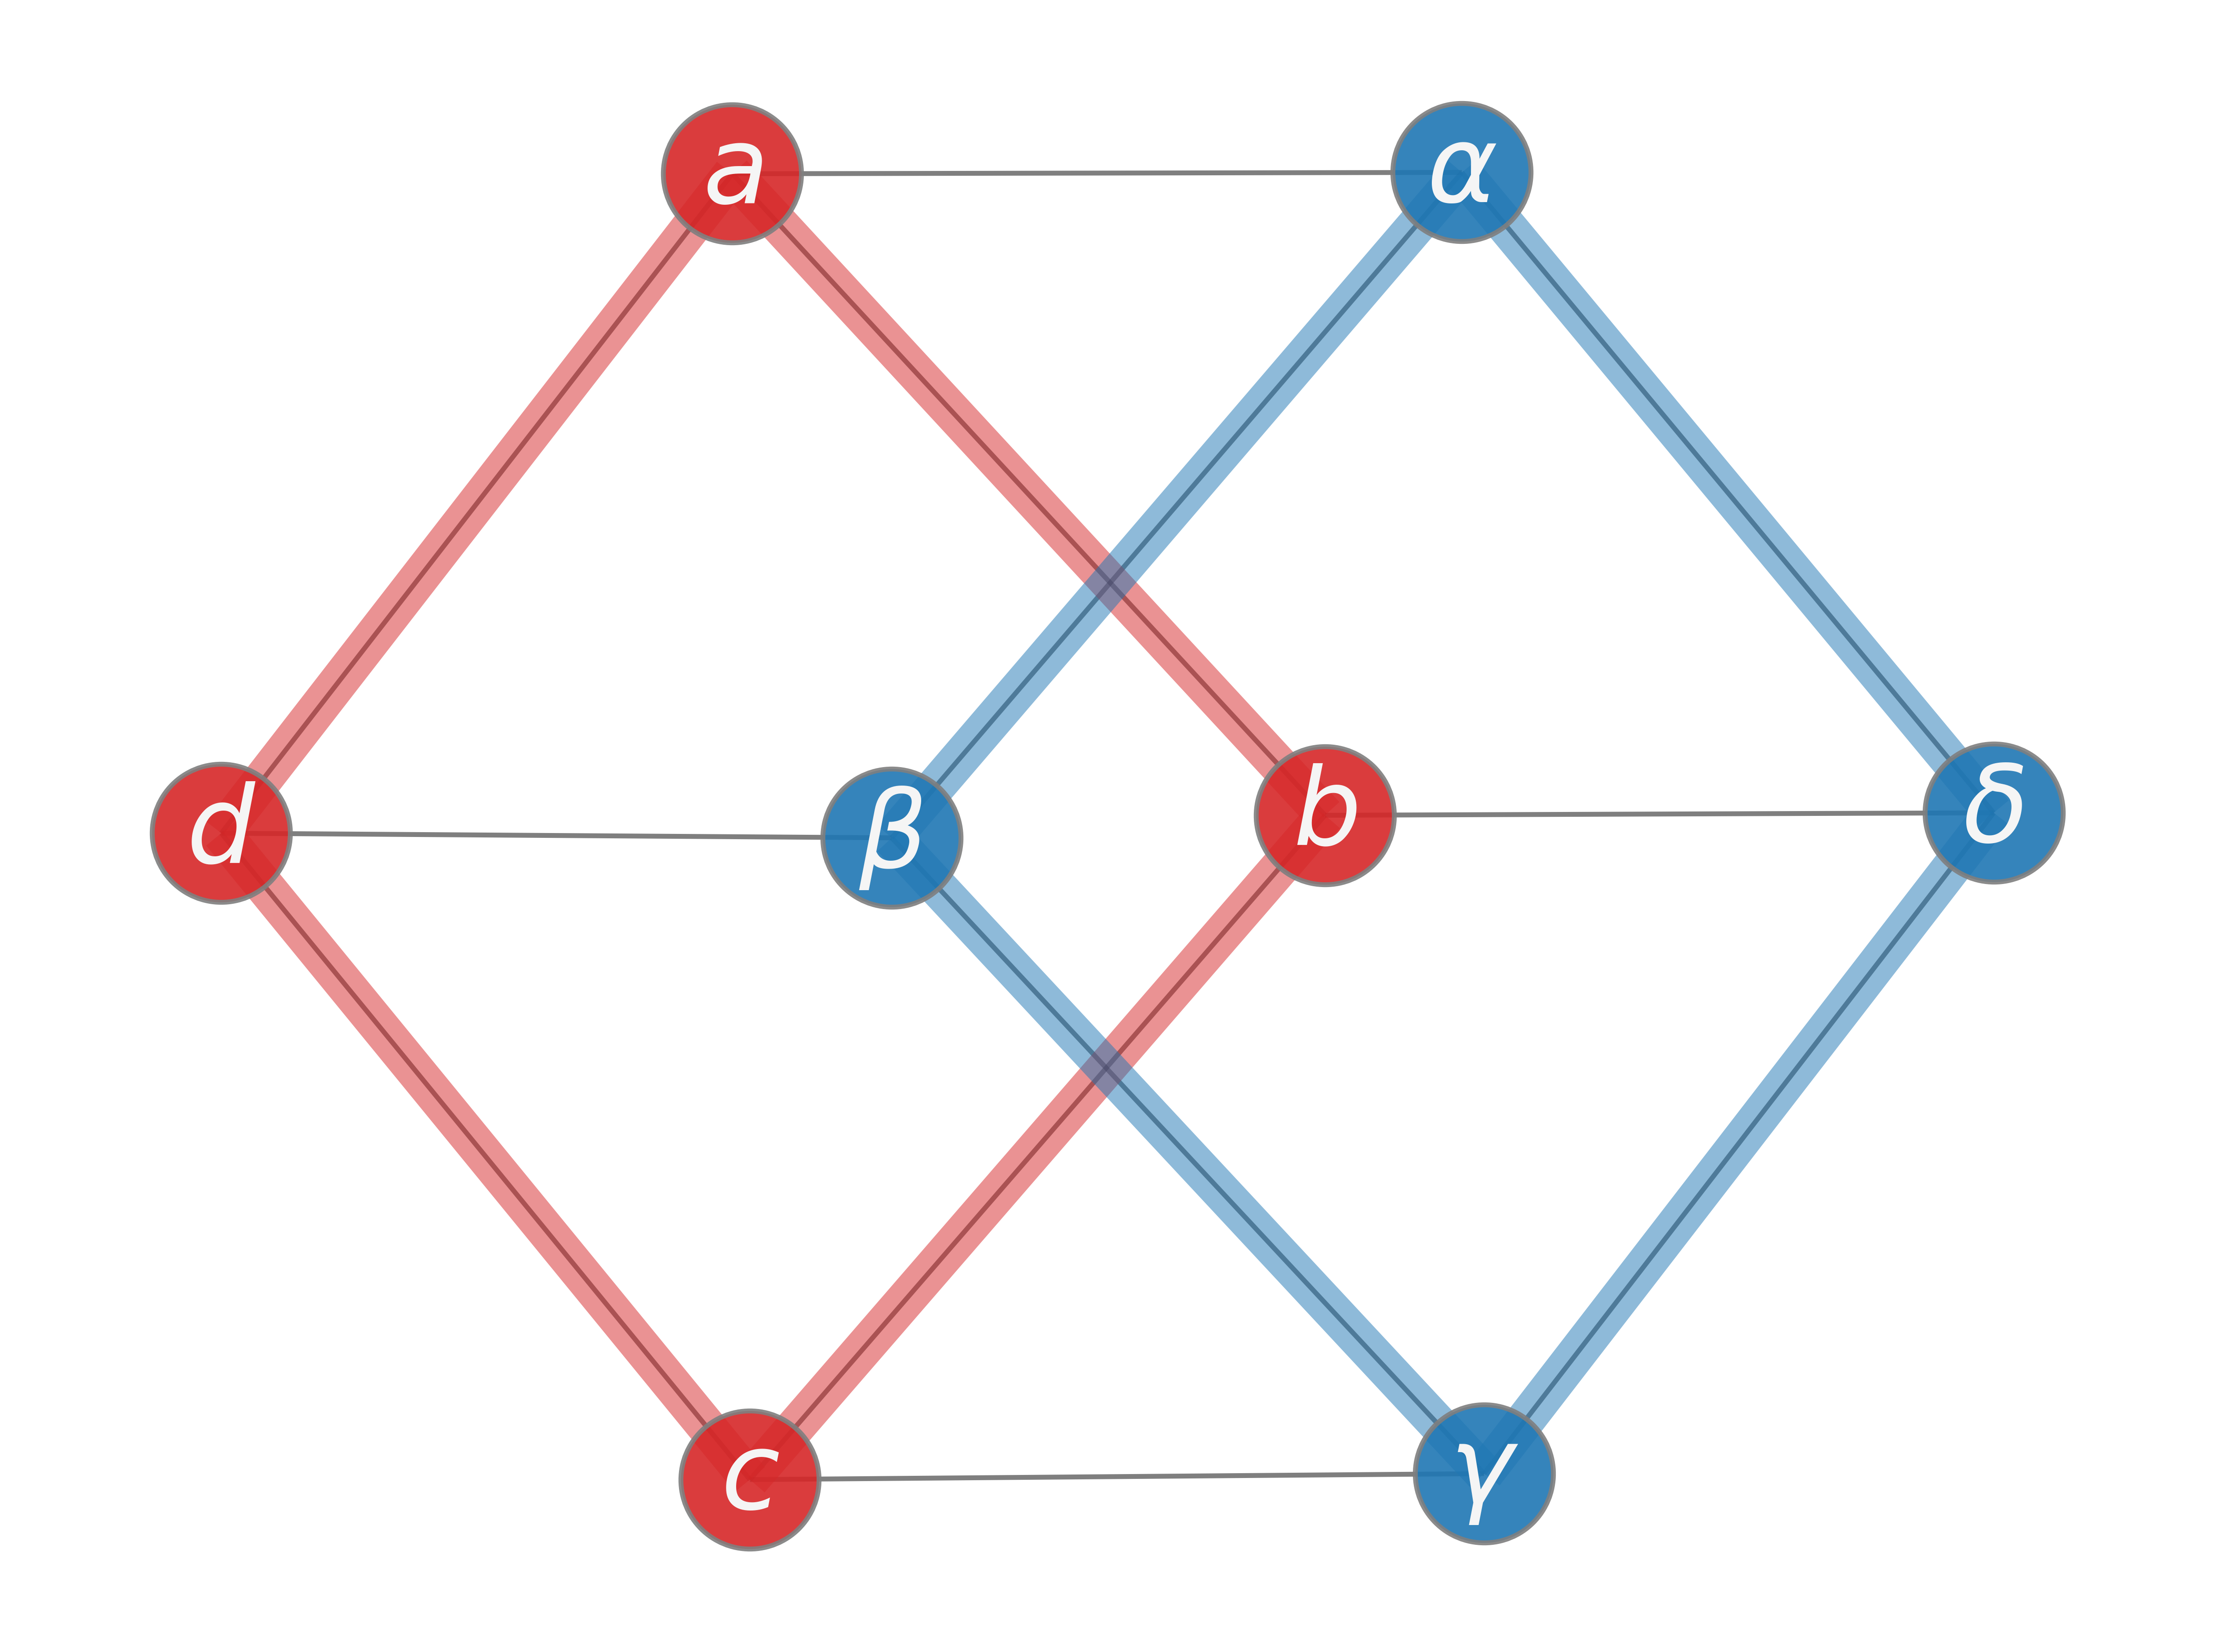

In [28]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

## ...

In [ ]:
def listMEPs_div(GDataset): # listing the different MEP names for the given dataset
    o = pd.unique(GDataset['MEPName'])
    return o
       
#defining 2 function for the projection creation
def CreateNXGraph(Graph):
    # we use MEPName instead of OfficialMEPID
    G = nx.from_pandas_edgelist(Graph, source='AmendmentID', target='MEPName')
    return G

## ez miért createBIPARTITE?? pont hogy a bipartiteBÓL csinál egy nem bipartite-ot
def ConnectFromBipartite(myGraph, Gtype, MEP_lista):
    #Gtype = which type of projection we use 
    if Gtype == "classic":
        G = nx.algorithms.bipartite.projected_graph(myGraph, MEP_lista)
    elif Gtype == "collab_weight":
        G = nx.algorithms.bipartite.collaboration_weighted_projected_graph(myGraph, MEP_lista)
    return G 

In [ ]:
ListsMEP = [set(listMEPs_div(miniGraph)) for miniGraph in split_data]#list for each subgraph
#print(ListsMEP)
meps_who_did_something_in_all_intervals = set.intersection(*ListsMEP)
print(meps_who_did_something_in_all_intervals)
print(len(meps_who_did_something_in_all_intervals))